In [1]:
import sys
sys.version

'3.6.4 |Anaconda custom (64-bit)| (default, Jan 16 2018, 12:04:33) \n[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]'

In [2]:
print (1/3)

0.3333333333333333


In [3]:
#General imports
from __future__ import division, print_function, unicode_literals
import numpy as np
import pandas as pd
import sklearn

#for visuals
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [4]:
products = pd.read_csv("amazon_baby.csv.gz",\
                       compression='gzip', sep=',', header=0)

In [5]:
products

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5
5,Stop Pacifier Sucking without tears with Thumb...,"When the Binky Fairy came to our house, we did...",5
6,A Tale of Baby\'s Days with Peter Rabbit,"Lovely book, it\'s bound tightly so you may no...",4
7,"Baby Tracker&reg; - Daily Childcare Journal, S...",Perfect for new parents. We were able to keep ...,5
8,"Baby Tracker&reg; - Daily Childcare Journal, S...",A friend of mine pinned this product on Pinter...,5
9,"Baby Tracker&reg; - Daily Childcare Journal, S...",This has been an easy way for my nanny to reco...,4


In [6]:
#number of products with unique name:
products['name'].unique().shape

(32418,)

In [7]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183531 entries, 0 to 183530
Data columns (total 3 columns):
name      183213 non-null object
review    182702 non-null object
rating    183531 non-null int64
dtypes: int64(1), object(2)
memory usage: 4.2+ MB


### Question 1: sort the 5 most popular items:

In [8]:
products['name'].value_counts().head()

Vulli Sophie the Giraffe Teether                                            785
Simple Wishes Hands-Free Breastpump Bra, Pink, XS-L                         562
Infant Optics DXR-5 2.4 GHz Digital Video Baby Monitor with Night Vision    561
Baby Einstein Take Along Tunes                                              547
Cloud b Twilight Constellation Night Light, Turtle                          520
Name: name, dtype: int64

In [9]:
#check if reviews are all unique:
products['review'].nunique()

182642

In [10]:
# some reviews are seen more than once!. Lets see what are they..
products['review'].value_counts().head(30)

very nice                                                                                                                                                                                       5
good                                                                                                                                                                                            5
Very good                                                                                                                                                                                       5
Excellent!                                                                                                                                                                                      4
Good                                                                                                                                                                                            3
very good                     

In [11]:
sum(products['review'].value_counts()>1)

38

In [12]:
products['rating'].value_counts()

5    107054
4     33205
3     16779
1     15183
2     11310
Name: rating, dtype: int64

In [13]:
products.isnull().sum()

name      318
review    829
rating      0
dtype: int64

In [14]:
products[products['review'].isnull()]

,name,review,rating
38,SoftPlay Twinkle Twinkle Elmo A Bedtime Book,NaN,5
58,Our Baby Girl Memory Book,NaN,5
721,"Summer Infant, Ultimate Training Pad - Twin Ma...",NaN,5
1050,Safety 1st Deluxe 4-in-1 Bath Station,NaN,1
1183,Northstate Superyard Playgate Light Gray,NaN,5
1373,Munchkin Mozart Magic Cube,NaN,5
1688,"Graco TotBloc Pack \'N Play with Carry Bag, Bu...",NaN,5
1689,"Graco TotBloc Pack \'N Play with Carry Bag, Bu...",NaN,5
2372,Prince Lionheart Table Edge Guard with 4 Corne...,NaN,2
2409,BABYBJORN Toilet Trainer - White/Red,NaN,5


In [17]:
products[products['name'].isnull()]

,name,review,rating
10551,NaN,"If you\'re searching for an elegant, inexpensi...",4
10552,NaN,This item looks very good and I was going to o...,1
10553,NaN,Bought this item for my child\'s crib but foun...,2
22234,NaN,Baby sleeps in this every single night. The ve...,5
22235,NaN,The hospital that we delivered at sent a micro...,5
22236,NaN,"I love that it\'s warm, but not too heavy so i...",5
22237,NaN,I just recently purchased this for my 2 month ...,5
22238,NaN,I bought this for my own daughter and ABSOLUTL...,5
22239,NaN,My little one always kicks her blanket off eve...,5
22240,NaN,The velboa sleepsack is so luxurious. My todd...,5


In [15]:
# Two ways:
# products['review'] = products['review'].fillna('')
#OR
def cleanNaN(value):
    if pd.isnull(value):
        return ""
    else:
        return value

In [16]:
products['review'] = products['review'].apply(cleanNaN)

In [17]:
products['name'] = products['name'].apply(cleanNaN)

In [18]:
products.isnull().sum()

name      0
review    0
rating    0
dtype: int64

### Nice, so we can now continue with the rest! Since we are interested in deciphering the reviews, i.e we want to know the probability/score of a good review so that we can predict using a logit function, we must find a way to extract each text in the review column. A common way to split an array of strings is by using string.split( ) but here we are going to use sklearn's library to split and encode to numbers using either bag-of-words or one-hot-encoding

In [19]:
#lets use bag-of-words technique:
from sklearn.feature_extraction.text import CountVectorizer

### This is a word count vector.. to count the number of words present in each row


### Question 2: will this increase or decrease the number of features?

In [20]:
vect = CountVectorizer()

In [21]:
#lets fit the input(reviews) to this word count vector so that new
#features will be generated
features = vect.fit_transform(products['review'])

In [22]:
type(features)

scipy.sparse.csr.csr_matrix

In [23]:
features.shape

(183531, 68032)

In [24]:
vect.get_feature_names()

['00',
 '000',
 '0001',
 '000ft',
 '000importer',
 '000sqft',
 '001',
 '001cm',
 '00am',
 '00amcreepy',
 '00cons',
 '00dollars',
 '00etwhile',
 '00not',
 '00pm',
 '01',
 '01262',
 '016sc01',
 '01992',
 '01p',
 '01wrgftjdd1bxmtbsg76',
 '02',
 '02000z',
 '02060',
 '02072',
 '02090',
 '020902nd',
 '0209a',
 '02100',
 '02100a',
 '0210a',
 '02180',
 '02220',
 '02640a',
 '02644',
 '02700',
 '02720',
 '03',
 '030',
 '0312258',
 '04',
 '0409',
 '0453',
 '046060us',
 '05',
 '05oz',
 '06',
 '0635',
 '07',
 '0752sjthe',
 '07pm',
 '07the',
 '08',
 '08280',
 '09',
 '093',
 '093010c',
 '09she',
 '09this',
 '0bviously',
 '0fast',
 '0ghz',
 '0ld',
 '0m',
 '0mm',
 '0ne',
 '0px',
 '0r',
 '0s',
 '0ver',
 '0z',
 '10',
 '100',
 '1000',
 '10000',
 '100000',
 '1000ccfor',
 '1000ma',
 '1000x',
 '10010',
 '10012telephone',
 '10084',
 '100ct',
 '100degree',
 '100f',
 '100feet',
 '100ft',
 '100lb',
 '100lbs',
 '100lbswill',
 '100mb',
 '100ml',
 '100next',
 '100oz',
 '100s',
 '100stars',
 '100th',
 '100x',
 '101'

In [29]:
print (features.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [26]:
example = features.toarray()[1]
example[5300]

0

In [27]:
example[5259]

3

In [28]:
vect.get_feature_names()[5259]

'and'

In [29]:
vect.get_feature_names()[5300]

'andmalready'

In [30]:
vect.vocabulary_.get('colorful')

14110

In [31]:
vect.vocabulary_.get('colourful')

14170

In [32]:
products['review'][1]

'it came early and was not disappointed. i love planet wise bags and now my wipe holder. it keps my osocozy wipes moist and does not leak. highly recommend it.'

In [33]:
vect.vocabulary_.get('it')

32459

In [34]:
#number of times non-zero appear in that particular row
features[1].nnz

23

In [35]:
from scipy import sparse

# this is to construct matrix from features[1]
ex = sparse.csr_matrix(features[1])
print(ex)

  (0, 48807)	1
  (0, 29300)	1
  (0, 34557)	1
  (0, 19817)	1
  (0, 38465)	1
  (0, 42185)	1
  (0, 33478)	1
  (0, 29572)	1
  (0, 66685)	1
  (0, 7627)	1
  (0, 66737)	1
  (0, 44846)	1
  (0, 35916)	1
  (0, 19114)	1
  (0, 65557)	1
  (0, 20897)	1
  (0, 11520)	1
  (0, 32459)	3
  (0, 40758)	1
  (0, 5259)	3
  (0, 40649)	2
  (0, 39375)	2
  (0, 66699)	1


In [36]:
print (vect.get_feature_names()[66699])

wipes


### Examine the most sold items from the data exploration above: Vulli Sophie the Giraffe Teether

In [37]:
products['name'].value_counts().head()

Vulli Sophie the Giraffe Teether                                            785
Simple Wishes Hands-Free Breastpump Bra, Pink, XS-L                         562
Infant Optics DXR-5 2.4 GHz Digital Video Baby Monitor with Night Vision    561
Baby Einstein Take Along Tunes                                              547
Cloud b Twilight Constellation Night Light, Turtle                          520
Name: name, dtype: int64

In [38]:
giraffe_reviews = products[products['name']\
                           =='Vulli Sophie the Giraffe Teether']

In [39]:
# just to check the length matches..
len(giraffe_reviews)

785

In [40]:
giraffe_reviews

,name,review,rating
34313,Vulli Sophie the Giraffe Teether,He likes chewing on all the parts especially t...,5
34314,Vulli Sophie the Giraffe Teether,My son loves this toy and fits great in the di...,5
34315,Vulli Sophie the Giraffe Teether,There really should be a large warning on the ...,1
34316,Vulli Sophie the Giraffe Teether,All the moms in my moms\' group got Sophie for...,5
34317,Vulli Sophie the Giraffe Teether,I was a little skeptical on whether Sophie was...,5
34318,Vulli Sophie the Giraffe Teether,I have been reading about Sophie and was going...,5
34319,Vulli Sophie the Giraffe Teether,My neice loves her sophie and has spent hours ...,5
34320,Vulli Sophie the Giraffe Teether,What a friendly face! And those mesmerizing s...,5
34321,Vulli Sophie the Giraffe Teether,We got this just for my son to chew on instead...,5
34322,Vulli Sophie the Giraffe Teether,"My baby seems to like this toy, but I could se...",3


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x150ba89e10>]],
      dtype=object)

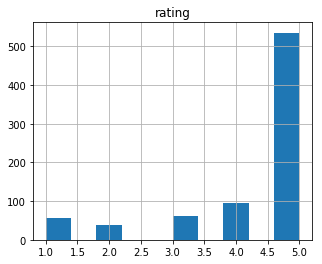

In [41]:
giraffe_reviews.hist(bins=10, figsize=(5,4))

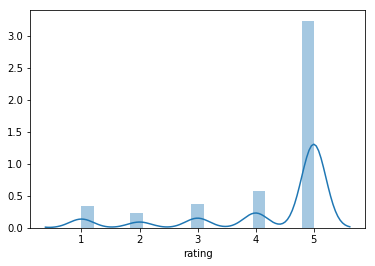

In [42]:
import seaborn as sns

sns.distplot(giraffe_reviews['rating'])

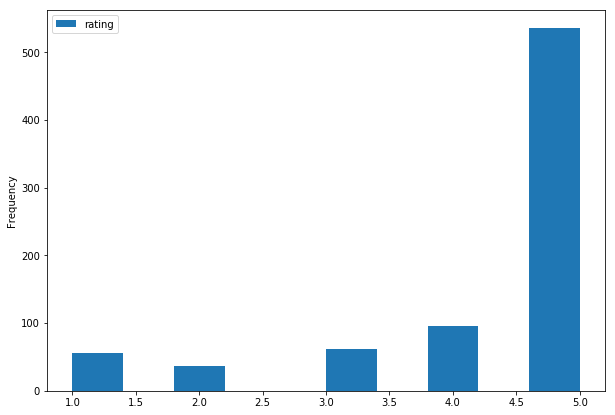

In [43]:
giraffe_reviews.plot(kind='hist', y='rating',\
                     orientation='vertical', figsize = (10,7))

## Examine for all products:

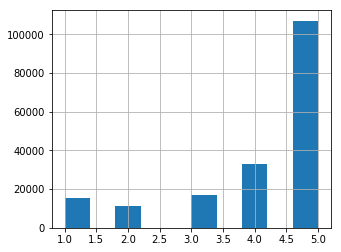

In [47]:
products['rating'].hist(bins=10, figsize=(5,4))

In [46]:
vect.__dict__

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'fixed_vocabulary_': False,
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': None,
 'min_df': 1,
 'ngram_range': (1, 1),
 'preprocessor': None,
 'stop_words': None,
 'stop_words_': set(),
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None,
 'vocabulary_': {'these': 60152,
  'flannel': 24538,
  'wipes': 66699,
  'are': 5976,
  'ok': 41418,
  'but': 11153,
  'in': 30849,
  'my': 39375,
  'opinion': 41830,
  'not': 40649,
  'worth': 67196,
  'keeping': 33421,
  'also': 4893,
  'ordered': 41992,
  'someimse': 55248,
  'vimse': 64934,
  'cloth': 13677,
  'ocean': 41176,
  'blue': 9436,
  '12': 303,
  'countwhich': 15974,
  'larger': 34297,
  'had': 28157,
  'nicer': 40203,
  'softer': 55114,
  'texture': 59683,
  'and': 5259,
  'just': 33253,
  'seemed': 52497,
  'higher': 29282,
  'quality': 47666,
  'us

## Build sentiment classifier

#### Define what is a good and bad review:

We do not get any value from rating 3. So it is probably best to remove it!

In [48]:
# I am not going to overwrite the original dataset.
product_final = products[products['rating'] != 3]

In [51]:
# This is the total number of items we are removing..
products[products['rating']==3].count()

name      16779
review    16779
rating    16779
dtype: int64

In [52]:
# create a new columns with True or False as an output
product_final['sentiment'] = product_final['rating']>=4

/Users/premkumar/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [54]:
product_final.head(20)

,name,review,rating,sentiment
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,True
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,True
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,True
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,True
5,Stop Pacifier Sucking without tears with Thumb...,"When the Binky Fairy came to our house, we did...",5,True
6,A Tale of Baby\'s Days with Peter Rabbit,"Lovely book, it\'s bound tightly so you may no...",4,True
7,"Baby Tracker&reg; - Daily Childcare Journal, S...",Perfect for new parents. We were able to keep ...,5,True
8,"Baby Tracker&reg; - Daily Childcare Journal, S...",A friend of mine pinned this product on Pinter...,5,True
9,"Baby Tracker&reg; - Daily Childcare Journal, S...",This has been an easy way for my nanny to reco...,4,True
10,"Baby Tracker&reg; - Daily Childcare Journal, S...",I love this journal and our nanny uses it ever...,4,True


In [56]:
# Total number of Outputs labelled as True or False
product_final['sentiment'].value_counts()

True     140259
False     26493
Name: sentiment, dtype: int64

In [58]:
#Grouping by name and seeing the total count..
product_final.groupby('name').count()

,review,rating,sentiment
name,,,
,296,296,296
# 1 Digital Baby Thermometer - With FREE LIFETIME GUARANTEE: Using Non-Contact Infra Red (IR) Technology giving you instant and accurate temperature readings - Protect your BABY from FEVER and ILLNESS by using the DUAL Colour Digital Display and AUDIO ALARM function. Instant temperature reading from Baby Forehead within 1cm to 6cm distance - AUDIO Warning will trigger when temperature exceeds (37.5&#8451;) - Built in Memory to store 20 Readings - Fully FDA Approved &amp; (C.E.) Rated for Safety - Sold in one neat compact size 0.23kg weight. Durable Silicone touch buttons for durability - The non-contact design allows an instant temperature reading while your baby is sleeping. Can also be used to take the temperature of Baby Milk Bottles - In STOCK &amp; SHIPS today for FREE with Amazon.com,4,4,4
"#1 Adjustable Back Seat Baby Safety Mirror - Easy To Fit - Mirror Attaches In Seconds To Rear Seat Head Rest And Rotates And Pivots For A Clear View - Designed To Help You See Your Baby When They Are In A Reward Facing Car Seat, Without You Having To Turn Your Head Whilst Driving - No Obstruction To Rear View Visibility - High Quality Material - Best Life Time Guarantee - Top Selling Baby Safety Product From Happy Snuggle",1,1,1
"#1 Baby Bottle Brush for All Types of Bottles &#9733; Baby Feeder Nipple Cleaner Brush with Small, Long Plastic Grip Hanging Loop Handle &#9733; Ergonomic Safe Bristle Heads for All Types of Water, Beer, Wine Bottles and Cups &#9733; Best Bottle Cleaner for All Types of Small and Long Bottles with Narrow Neck &#9733; Finest Nipple Brush and Best Feeder Brush for Baby Bottles &#9733; Order High Quality Product with Lifetime Guarantee &#9733;",3,3,3
"#1 Premium Baby Nasal Aspirator by Cutietots - The Snot Sucker That Clears Away Baby\'s Stuffy Nose Gently and Instantly - Easy to Clean, Hygienic, BPA and Latex FREE - Great for Baby Showers with Its Lovely Packaging - Works Well with Nasal Saline Solutions - 100% Satisfaction Money Back Guarantee!!!",4,4,4
#120 - 2.5mm Dr Mom Specula Tips - Premium Quality,2,2,2
#46 pink ballet leg warmers for baby or girl by My Little Legs,3,3,3
#55 Red &amp; blue stars patriotic leg warmers for boy or girl by My Little Legs,1,1,1
#70 Preppy Pink argyle baby leg warmers by My Little Legs,3,3,3


## Define X and y

In [60]:
X = product_final['review']
y = product_final['sentiment']

In [61]:
# it is always good to double check the variables
X[2]

'Very soft and comfortable and warmer than it looks...fit the full size bed perfectly...would recommend to anyone looking for this type of quilt'

In [63]:
# make a 80:20 split for training and testing using train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split\
(X,y,test_size = 0.2,random_state = 42) #stick to the same seed

print ("Training size: {}, Testing size: {}".format(X_train.shape[0],\
                                                   X_test.shape[0]))

Training size: 133401, Testing size: 33351


In [64]:
X_train.head()

526       You cannot imagine how much money you\'ll save...
31099     I wanted to point out a couple things I didn\'...
37073     When I first started using cloth wipes, I only...
58906     I read all the reviews and saw that the review...
129845    So glad I bought this set. For the number that...
Name: review, dtype: object

### Lets vectorize again for both training and testing data..

In [86]:
#create a document-term-matrix for the number of words on training set
X_train_dtm = vect.fit_transform(X_train)
X_train_dtm

<133401x57485 sparse matrix of type '<class 'numpy.int64'>'
	with 7080210 stored elements in Compressed Sparse Row format>

In [66]:
# the statement above means the vector now has 57585 unique words
len(vect.get_feature_names())

57485

In [69]:
## not a must do.. entirely optional for you to check!!
ex_Input1 = sparse.csr_matrix(X_train_dtm[0])
print (ex_Input1)
print("")

#another way to do the above is just to feed it to the print
print (X_train_dtm[0])

  (0, 56612)	1
  (0, 6209)	1
  (0, 50571)	1
  (0, 10359)	1
  (0, 51570)	1
  (0, 24220)	1
  (0, 55696)	1
  (0, 21163)	1
  (0, 39307)	1
  (0, 56496)	2
  (0, 6244)	1
  (0, 22129)	1
  (0, 45679)	1
  (0, 28423)	1
  (0, 4536)	1
  (0, 54184)	2
  (0, 9613)	1
  (0, 3821)	1
  (0, 5334)	1
  (0, 46179)	1
  (0, 16642)	1
  (0, 27339)	3
  (0, 4274)	2
  (0, 43719)	1
  (0, 29865)	1
  (0, 32492)	1
  (0, 32922)	1
  (0, 25268)	1
  (0, 25793)	1
  (0, 9675)	1
  (0, 57251)	3

  (0, 56612)	1
  (0, 6209)	1
  (0, 50571)	1
  (0, 10359)	1
  (0, 51570)	1
  (0, 24220)	1
  (0, 55696)	1
  (0, 21163)	1
  (0, 39307)	1
  (0, 56496)	2
  (0, 6244)	1
  (0, 22129)	1
  (0, 45679)	1
  (0, 28423)	1
  (0, 4536)	1
  (0, 54184)	2
  (0, 9613)	1
  (0, 3821)	1
  (0, 5334)	1
  (0, 46179)	1
  (0, 16642)	1
  (0, 27339)	3
  (0, 4274)	2
  (0, 43719)	1
  (0, 29865)	1
  (0, 32492)	1
  (0, 32922)	1
  (0, 25268)	1
  (0, 25793)	1
  (0, 9675)	1
  (0, 57251)	3


In [78]:
X_train.values[0]

"You cannot imagine how much money you\\'ll save and it doesn\\'t smell AT ALL!!! You can use any kitchen size garbage bags without a problem and use it for A WEEK without having to change the bag. IT\\'S WONDERFULL!!!"

In [96]:
B = sparse.csr_matrix(X_train_dtm[0])
print (B.__dict__)
print (B.data)
print (B.indices)

{'_shape': (1, 57485), 'maxprint': 50, 'data': array([1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 3]), 'indices': array([ 3821,  4274,  4536,  5334,  6209,  6244,  9613,  9675, 10359,
       16642, 21163, 22129, 24220, 25268, 25793, 27339, 28423, 29865,
       32492, 32922, 39307, 43719, 45679, 46179, 50571, 51570, 54184,
       55696, 56496, 56612, 57251], dtype=int32), 'indptr': array([ 0, 31], dtype=int32)}
[1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 2 1 2 1 3]
[ 3821  4274  4536  5334  6209  6244  9613  9675 10359 16642 21163 22129
 24220 25268 25793 27339 28423 29865 32492 32922 39307 43719 45679 46179
 50571 51570 54184 55696 56496 56612 57251]


In [74]:
#can always check for features given the sparse matrix
print (vect.get_feature_names()[57251])

you


### Question 3: Write a function that returns the words that have been indexed by the CountVectorizer and their respective word counts, given a particular review. 

### Question 4: Also, for simplicity, write another function that vectorizes any given data so that you don't need to write the whole code again

In [89]:
#For Question 3: to count the number of words:
def wordCount(data_dtm, index):
    A = sparse.csr_matrix(data_dtm[index])
    #countA = A.data
    #indexA = A.indices
    columns = A.nonzero()[1] # A.nonzero returns (row, column), so you select 1
    words = [vect.get_feature_names()[i] for i in columns]
    return words

# This is actually totally redundant.. But just for the sake of learning..
#For Question 4: to vectorize
def word_vectorizer(data):
    return vect.fit_transform(data)

In [90]:
wordCount(X_train_dtm, 10000)

['thinks',
 'jumping',
 'calls',
 'fell',
 'adult',
 'broke',
 'bed',
 'literally',
 'wooden',
 'knows',
 'decided',
 'sturdy',
 '2yr',
 'big',
 'apart',
 'plastic',
 'many',
 'old',
 'her',
 'hold',
 'daughter',
 'an',
 'up',
 'will',
 'buy',
 'years',
 'floor',
 'no',
 'our',
 'we',
 'as',
 'more',
 'now',
 'was',
 'toddler',
 'so',
 'because',
 'she',
 'from',
 'even',
 'on',
 'loves',
 'this',
 'my',
 'of',
 'is',
 'the',
 'to',
 'for',
 'it',
 'and']

In [91]:
X_test_dtm = vect.transform(X_test)

In [92]:
print(X_test_dtm[0])

  (0, 4274)	1
  (0, 4536)	1
  (0, 15699)	1
  (0, 15708)	1
  (0, 17634)	1
  (0, 20160)	1
  (0, 20547)	1
  (0, 24930)	1
  (0, 27339)	1
  (0, 34253)	2
  (0, 34767)	1
  (0, 35635)	1
  (0, 49799)	1
  (0, 50571)	1
  (0, 51570)	2
  (0, 52471)	1
  (0, 52647)	1
  (0, 54184)	1
  (0, 55599)	1


## Fit a logistic regression model:

### Logistic Regression has a high training time!

In [93]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_dtm,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [94]:
model.__dict__

{'C': 1.0,
 'class_weight': None,
 'classes_': array([False,  True]),
 'coef_': array([[-5.64981272e-01,  5.88074516e-02,  8.10576695e-03, ...,
          9.26188890e-03,  3.10111429e-03, -1.09606262e-04]]),
 'dual': False,
 'fit_intercept': True,
 'intercept_': array([1.29629836]),
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_iter_': array([100], dtype=int32),
 'n_jobs': 1,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [97]:
# Class predictions and predicted probabilities
y_pred_class = model.predict(X_test_dtm)
y_pred_prob = model.predict_proba(X_test_dtm)[:,1]

In [98]:
y_pred_prob

array([0.49721689, 0.20349563, 0.08640665, ..., 0.99998938, 0.99983152,
       0.92801356])

In [99]:
y_pred_class

array([False, False, False, ...,  True,  True,  True])

What `predict_proba` does is to compute the probabilities of the predicted test data. 

In [100]:
# Check out the coeff:
coef = model.__dict__['coef_']
print (coef.shape)
print (np.max(coef))
print (np.min(coef))
print ('')
print (np.argmax(coef)) #index of the max value
print (np.argmin(coef)) #index of the min value
print (coef)

(1, 57485)
2.093603459483797
-2.8386188600994466

12357
16404
[[-5.64981272e-01  5.88074516e-02  8.10576695e-03 ...  9.26188890e-03
   3.10111429e-03 -1.09606262e-04]]


What we want to find out now are the words that are associated to a high-value coefficient. Think of them as being multiplied by a positive weight that contributes towards the score total. Keep in mind, also, that the higher the value computed from function h(x), the more the logistic function tends towards 1, which means a positive sentiment. Think of a low value coefficient having the opposite effect.

<br>

Now, lets sort the coefficients, and then get the words associated to the 10 lowest and 10 highest coefficients:

In [102]:
sorted_coef = np.argsort(coef)

words = [vect.get_feature_names()[sorted_coef[0][i]] for \
        i in range(0,10)]
print ('words with lowest coefficients:{}'.format(words))
print('')
words1 = [vect.get_feature_names()[sorted_coef[0][i]] for \
        i in range(-10,0)]
print ('words with highest coefficients:{}'.format(words1))

words with lowest coefficients:['dissapointed', 'worthless', 'worst', 'poorly', 'disappointing', 'useless', 'unusable', 'disappointed', 'pointless', 'bummer']

words with highest coefficients:['perfectly', 'wonderfully', 'perfect', 'excellent', 'worry', 'skeptical', 'minor', 'lifesaver', 'saves', 'con']


In [111]:
print(np.sort(coef))
print(np.exp(-2.4))
print(1/(1+np.exp(-1*-7.9)))

[[-2.83861886 -2.6629788  -2.53503142 ...  2.01535213  2.04287281
   2.09360346]]
0.09071795328941251
0.00037060614062639654


### Precision and Recall score with ROC

In [112]:
from sklearn import metrics

print (metrics.accuracy_score(y_test,y_pred_class))

0.9338550568198855


In [113]:
#calculate ROC score - a curve of TPR vs FPR
print (metrics.roc_auc_score(y_test,y_pred_prob))


0.9564515408619039


In [114]:
from sklearn.metrics import precision_score, recall_score

print (precision_score(y_test, y_pred_class))
print (recall_score(y_test, y_pred_class))

0.9510128656601932
0.9714713110375041


In [116]:
#calculate confusion matrix
print (metrics.confusion_matrix(y_test,y_pred_class))

[[ 3869  1405]
 [  801 27276]]


False positive rate:[0.         0.         0.         ... 0.98483125 0.98483125 1.        ]
True positive rate:[5.34245112e-04 5.69861452e-04 7.83559497e-04 ... 9.99964384e-01
 1.00000000e+00 1.00000000e+00]
Thresholds:[1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 8.94991167e-07
 8.62557299e-07 1.07240156e-22]


Text(0,0.5,'True Positive Rate')

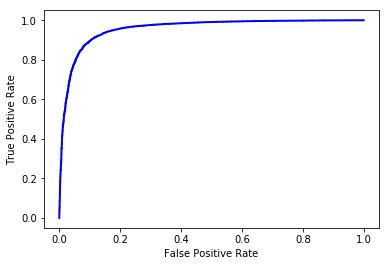

In [118]:
# Lets plot ROC curve:
fpr, tpr, threshold = metrics.roc_curve(y_test,y_pred_prob, pos_label=1)
print ('False positive rate:{}'.format(fpr))
print ('True positive rate:{}'.format(tpr))
print ('Thresholds:{}'.format(threshold))
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,'b-', linewidth=2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")